<a href="https://colab.research.google.com/github/HongWonSeok/STUDY/blob/main/%EB%AA%A8%EB%91%90%EC%9D%98_%EB%94%A5%EB%9F%AC%EB%8B%9D_%EC%8B%9C%EC%A6%8C2_LAB_07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**모두의 딥러닝 시즌2 with Pytorch - LAB 07**

**목차**

**1. Tips**
- Reminder : Maximum Likelihood Estimation
- Reminder : Optimization via Gradient Descent
- Reminder : Overfitting and Regrularization
- Training and Test Dataset
- Learning Rate
- Data Preprocessing

**2. MNIST introduction**
- What is MNIST?
- Code:MNIST Classifier

#Tips

**Maximum Likelihood Estimation(MLE)**

압정이 하나 있다고 가정해보자. 압정이 바닥에 떨어지게 되면 압정의 뾰족한부분이 위로 향하게 떨어질 수 도 있고(이 경우는 1번), 뾰족한부분이 아래로 향하게 떨이질 수도 있다(이 경우는 2번). 1번이될 확률과 2번이될 확률을 구하고싶다. 이것을 머신러닝으로 구해본다.

우선 이것의 확률은 1과2두개가 나타날 확률이기 때문에 이항분포(베르누이 분포)로 binary classification을 수행하면 된다.

이것을 구하기위해 직접 던져볼 경우 100번던졌을때(n==100) 1이 27번나왔다(k==27)고 해보자. 이 관찰값을 이항분포 식에 대입해보자.

이항분포(Binary Destribution)의 공식은 아래와 같다.

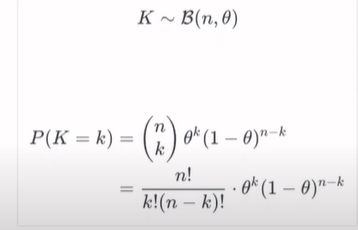

위의 관찰값을 보게되면 n=100 , k=27 이고, 우리가 알고싶은 값은 Θ이다. 이것을 이용해 Θ의 함수(식)를 구할 수 있다.

그래서 이 수식을 그래프로 그리면 아래와 같다. x축은 세타이고 y축이 liklihood이다. **여기서 우리가 원하는 MLE는 y값(liklihood)이 최대가 되는 지점이 된다.**

그지점의 세타를 구하게되면 Θ는 0.27이 나오게 된다. 

**즉, Maximum Likelihood Estimation(MLE)는 Observation(관찰값)을 가장 잘 설명하는 어떤 확률분포함수의 파라미터(Θ)를 찾아내는 과정이다.**

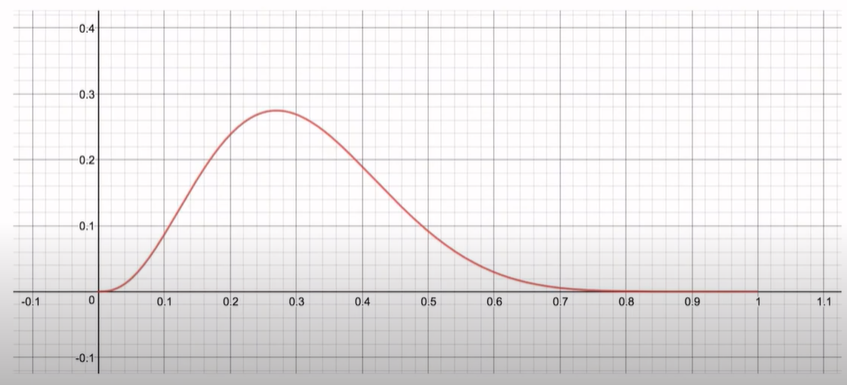

**Optimization via Gradient Descent**

- Local Maxima : likihood를 구하는 것 이기 떄문에 Gradient Ascent를 해줌

- Local Minima : Gradient Descent 식은 Θ <- Θ - α∇(Θ)L(x;Θ)

**Overfitting**

- 주어진 Data에 대해 과도하게 fitting된 상황 

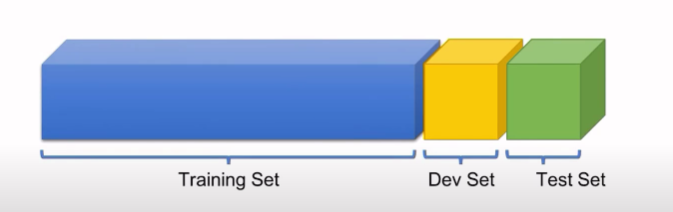

Training Set - 0.8 // Test set     - 0.1 ~ 0.2// Development Set(Validation Set)  - 0 ~ 0.1

Training Set에 우리 모델이 과도하게 학습이 되버리면 Test 에대해 해당 모델이 좋은 성능을 얻기 어려울 것이다. 그래서 Test Set을 통해 Overfitting의 여부를 알 수 있다. Development Set의 경우에는 Test Set에대해서도 overfitting이 될수있는데 이것을 방지해주는 역할을 한다.
예를들어 딥러닝모델을 훈련시 Training Set에서 훈련을하고 Test Set에서 검증을 하여 가장 좋은 성능을 가진 모델을 선택하도록 반복을 하게되면 Training과 Test Set에 대해 overfitting이 될 수 있다. 그래서 Development Set에서 검증을 한 이후에 Test Set에 대해 Test를 하면 훨씬 더 정확한 값을 얻을 수 있다.

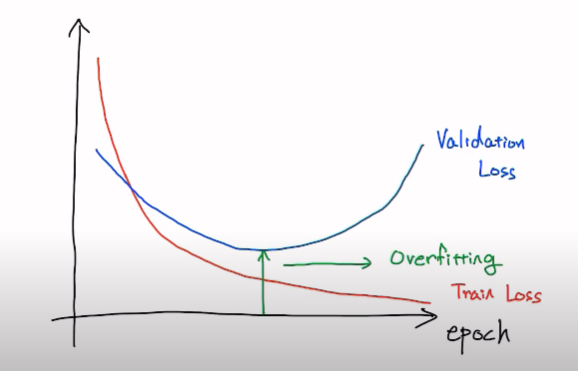

위에 그림과 같이 epoch가 커질 수록 Train Loss는 점점 작아지지만 Validation Loss는 점점 작아지다가 한점을 기준으로 다시 높아지는 것을보인다. 그래서 이점을 기준으로 Validation Loss는 점점 높아지고 Train Loss는 점점 작아져서 차이가 점점 벌어지고 있다. 그래서 우리는 이 지점부터 overfitting이 시작된다고 할 수 있다.

Training Set과 Test Set을 통해서 현재모델이 얼마나 학습이 진행됐는지 알아볼 수 있고, Validation Loss가 점점 커지기 시작하면 학습을 중단 시킬 수 있다. 

Overfitting 막기위한 방법

1. More Data(데이터 많이 모으기) 
 - 데이터를 적게 모을수록 실제분포에서 편향된 값을 얻을 수 도 있음

2. Less features
 - feature들을 줄이면 overfitting을 막을 수 있음

3. Regularization
 - Early Stopping - Validation Loss가 더이상 낮아지지 않을 때
 - Reducing Network Size - 딥러닝에 한 해서는 뉴럴네트워크 사이즈를 줄이는것도 방법이다.
 - Weight Decay - Weight 파라미터 크기를 줄이는 방법 
 - Dropout
 - Batch Normalization


Basix Approach to Train DNN(Deep Neural Network)

1. Make a neural network architecture. 
2. Train and check that model is over-fitted. //오버피팅이 되는 곳까지 학습시킨다.
 - a. If it is not, increase the model size (deeper and wider) // input/output size는 fix 
 - b. If it is, add regularization, such as drop-out, batch-nromalization.
3. Repeat from step-2



In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [ ]:
torch.manual_seed(1)

Training and Test DataSet

In [ ]:
x_train = torch.FloatTensor([[1, 2, 1],
                             [1, 3, 2],
                             [1, 3, 4],
                             [1, 5, 5],
                             [1, 7, 5],
                             [1, 2, 5],
                             [1, 6, 6],
                             [1, 7, 7]
                            ])
y_train = torch.LongTensor([2, 2, 2, 1, 1, 1, 0, 0])

In [ ]:
x_test = torch.FloatTensor([[2, 1, 1], [3, 1, 2], [3, 3, 4]])
y_test = torch.LongTensor([2, 2, 2])

Model

In [ ]:
class SoftmaxClassifierModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(3,3)
  def forward(self, x):
    return self.linear(x)

In [ ]:
model = SoftmaxClassifierModel()

In [ ]:
# optimizer 설정
optimizer = optim.SGD(model.parameters(), lr=0.1)

Training

In [ ]:
def train(model, optimizer, x_train, y_train):
  nb_epochs = 20
  for epoch in range(nb_epochs):

    # H(x) 계산
    prediction = model(x_train)

    # cost 계산
    cost = F.cross_entropy(prediction, y_train)

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    print('Epoch {:4d}/{} Cost: {:.6f}'.format(
        epoch, nb_epochs, cost.item()
    ))

Test(Validation)

In [ ]:
def test(model, optimizer, x_test, y_test):
  prediction = model(x_test)
  predicted_classes = prediction.max(1)[1]
  correct_count = (predicted_classes == y_test).sum().item()
  cost = F.cross_entropy(prediction, y_test)

  print('Accuracy: {}% Cost: {:.6f}'.format(
      correct_count / len(y_test) * 100, cost.item()
  ))

Run

In [ ]:
train(model, optimizer, x_train, y_train)

Epoch    0/20 Cost: 2.203667
Epoch    1/20 Cost: 1.199645
Epoch    2/20 Cost: 1.142985
Epoch    3/20 Cost: 1.117769
Epoch    4/20 Cost: 1.100901
Epoch    5/20 Cost: 1.089523
Epoch    6/20 Cost: 1.079872
Epoch    7/20 Cost: 1.071320
Epoch    8/20 Cost: 1.063325
Epoch    9/20 Cost: 1.055720
Epoch   10/20 Cost: 1.048378
Epoch   11/20 Cost: 1.041245
Epoch   12/20 Cost: 1.034285
Epoch   13/20 Cost: 1.027478
Epoch   14/20 Cost: 1.020813
Epoch   15/20 Cost: 1.014279
Epoch   16/20 Cost: 1.007872
Epoch   17/20 Cost: 1.001586
Epoch   18/20 Cost: 0.995419
Epoch   19/20 Cost: 0.989365


In [ ]:
test(model, optimizer, x_test, y_test)

Accuracy: 0.0% Cost: 1.425844


train함수의 결과를 보게되면 cost가 점점 떨어지는 것을 볼수 있고, test함수를 보게되면 Cost가 1.425844로 cost값이 높아졌다. 이것으로 Train Loss의값은 많이 떨어졌지만 Test Loss의 값이 이미 올라가버린 상황이 발생된 것을 알 수 있다.
그래서 이 epoch에서 세타를 골랐을때 overfitting이된 상태라는 것을 알 수 있다.

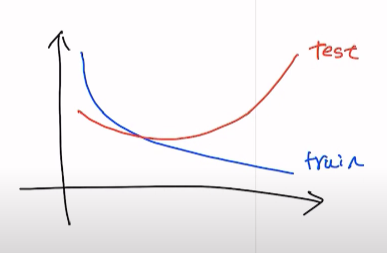

**Learning Rate**
- learning rate이 너무 크면 발산(diverge) 하면서 cost가 점점 늘어난다(overshooting)


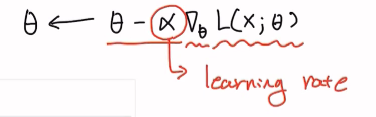

In [ ]:
model = SoftmaxClassifierModel()

In [ ]:
optimizer = optim.SGD(model.parameters(),lr=1e5)  

In [ ]:
train(model, optimizer, x_train, y_train)

Epoch    0/20 Cost: 1.280268
Epoch    1/20 Cost: 976950.750000
Epoch    2/20 Cost: 1279135.250000
Epoch    3/20 Cost: 1198378.875000
Epoch    4/20 Cost: 1098825.750000
Epoch    5/20 Cost: 1968197.750000
Epoch    6/20 Cost: 284763.250000
Epoch    7/20 Cost: 1532260.250000
Epoch    8/20 Cost: 1651503.875000
Epoch    9/20 Cost: 521878.531250
Epoch   10/20 Cost: 1397263.250000
Epoch   11/20 Cost: 750986.375000
Epoch   12/20 Cost: 918691.500000
Epoch   13/20 Cost: 1487888.250000
Epoch   14/20 Cost: 1582260.125000
Epoch   15/20 Cost: 685818.125000
Epoch   16/20 Cost: 1140048.875000
Epoch   17/20 Cost: 940566.500000
Epoch   18/20 Cost: 931638.187500
Epoch   19/20 Cost: 1971322.750000


learning rate이 너무 작으면 cost가 거의 줄어들지 않는다.

In [ ]:
model = SoftmaxClassifierModel()

In [ ]:
optimizer = optim.SGD(model.parameters(), lr=1e-10)

In [ ]:
train(model, optimizer, x_train, y_train)

Epoch    0/20 Cost: 0.819480
Epoch    1/20 Cost: 0.819480
Epoch    2/20 Cost: 0.819480
Epoch    3/20 Cost: 0.819480
Epoch    4/20 Cost: 0.819480
Epoch    5/20 Cost: 0.819480
Epoch    6/20 Cost: 0.819480
Epoch    7/20 Cost: 0.819480
Epoch    8/20 Cost: 0.819480
Epoch    9/20 Cost: 0.819480
Epoch   10/20 Cost: 0.819480
Epoch   11/20 Cost: 0.819480
Epoch   12/20 Cost: 0.819480
Epoch   13/20 Cost: 0.819480
Epoch   14/20 Cost: 0.819480
Epoch   15/20 Cost: 0.819480
Epoch   16/20 Cost: 0.819480
Epoch   17/20 Cost: 0.819480
Epoch   18/20 Cost: 0.819480
Epoch   19/20 Cost: 0.819480


적절한 숫자로 시작해 발산하면 작게, cost가 줄어들지 않으면 크게 조정하자

In [ ]:
model = SoftmaxClassifierModel()

In [ ]:
optimizer = optim.SGD(model.parameters(), lr=1e-1)

In [ ]:
train(model, optimizer, x_train, y_train)

Epoch    0/20 Cost: 3.187324
Epoch    1/20 Cost: 1.334308
Epoch    2/20 Cost: 1.047911
Epoch    3/20 Cost: 0.996043
Epoch    4/20 Cost: 0.985740
Epoch    5/20 Cost: 0.977224
Epoch    6/20 Cost: 0.970065
Epoch    7/20 Cost: 0.963589
Epoch    8/20 Cost: 0.957561
Epoch    9/20 Cost: 0.951825
Epoch   10/20 Cost: 0.946302
Epoch   11/20 Cost: 0.940942
Epoch   12/20 Cost: 0.935718
Epoch   13/20 Cost: 0.930613
Epoch   14/20 Cost: 0.925613
Epoch   15/20 Cost: 0.920711
Epoch   16/20 Cost: 0.915902
Epoch   17/20 Cost: 0.911182
Epoch   18/20 Cost: 0.906547
Epoch   19/20 Cost: 0.901994


Data Preprocessing(데이터 전처리)

In [ ]:
x_train = torch.FloatTensor([[73, 80, 75],
                             [93, 88, 93],
                             [89, 91, 90],
                             [96, 98, 100],
                             [73, 66, 70]])
y_train = torch.FloatTensor([[152], [185], [180], [196], [142]])

standardization(정규분포화)

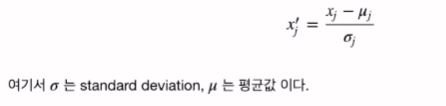

In [ ]:
mu = x_train.mean(dim=0)
sigma = x_train.std(dim=0)
norm_x_train = (x_train -mu) /sigma
print(norm_x_train)

tensor([[-1.0674, -0.3758, -0.8398],
        [ 0.7418,  0.2778,  0.5863],
        [ 0.3799,  0.5229,  0.3486],
        [ 1.0132,  1.0948,  1.1409],
        [-1.0674, -1.5197, -1.2360]])


Training with Preprocessed Data

In [ ]:
class MultivariateLinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(3,1)
  def forward(self, x):
    return self.linear(x)

In [ ]:
model = MultivariateLinearRegressionModel()

In [ ]:
optimizer = optim.SGD(model.parameters(), lr=1e-1)

In [ ]:
def train(model, optimizer, x_train, y_train):
  nb_epochs = 20
  for epoch in range(nb_epochs):

    # H(x) 계산
    prediction = model(x_train)

    # cost 계산
    cost = F.mse_loss(prediction, y_train)

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    print('Epoch {:4d}/{} Cost: {:.6f}'.format(
        epoch, nb_epochs, cost.item()
    ))

In [ ]:
train(model, optimizer, norm_x_train, y_train)

Epoch    0/20 Cost: 29476.677734
Epoch    1/20 Cost: 18728.177734
Epoch    2/20 Cost: 11946.348633
Epoch    3/20 Cost: 7634.266602
Epoch    4/20 Cost: 4882.764648
Epoch    5/20 Cost: 3124.194336
Epoch    6/20 Cost: 1999.400757
Epoch    7/20 Cost: 1279.729858
Epoch    8/20 Cost: 819.193237
Epoch    9/20 Cost: 524.461670
Epoch   10/20 Cost: 335.832794
Epoch   11/20 Cost: 215.106110
Epoch   12/20 Cost: 137.836304
Epoch   13/20 Cost: 88.378960
Epoch   14/20 Cost: 56.721485
Epoch   15/20 Cost: 36.456116
Epoch   16/20 Cost: 23.481792
Epoch   17/20 Cost: 15.174074
Epoch   18/20 Cost: 9.852999
Epoch   19/20 Cost: 6.443649


#MNIST Introduction

**What is MNIST?**

0~9까지의 숫자 이미지

옛날 우체국에서 숫자들을 자동으로 인식하기위해서 만들어짐

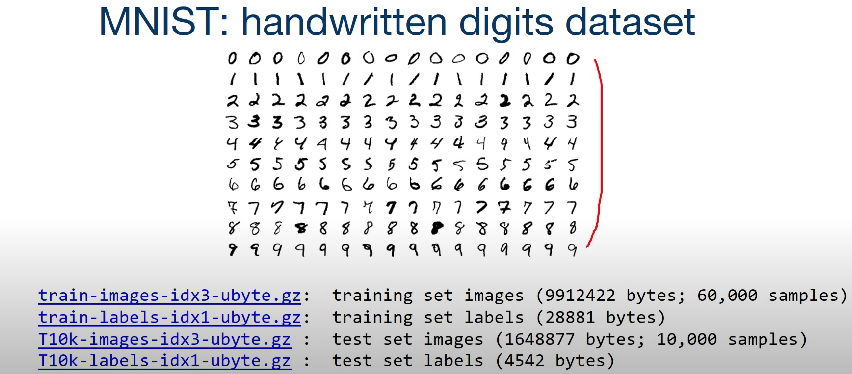

**torchvision**

trochvision.datasets을 이용하여 MNIST, DataLoader함수를 사용.

MNIST 함수
- root // 어느경로에 MNIST Data가 있는지
- train // True는 train Set을 불러옴 False는 Test Set을 불러옴
- Transform 
 - MNIST이미지들을 불러올때 어떤 transform을 이용할 것인지 
 - ToTensor // (Pytorch의 경우 사진은 0-1의 값을 가지게됨(C,H,W)/이미지는 0~255의 값 (H,W,C))인데 이것을 이미지를 PyTorch 에 맞게 바꿔줌
- download // root에 MNIST data가 존재하지 않으면 다운

DataLoader
- DataLoader // 어떤데이터를 Load할것인지
- batch_size // 이미지를 불러올때 몇개씩 잘라서 부를것인지
- shuffle // True : 무작위로
- drop_last // True : 맨뒤에 남는 데이터들을 사용 x

for문을 이용하여 DataLoader를 불러옴
- X에는 MNIST 이미지, Y는 Label(0-9)를 불러옴
- X : 28*28를 view를 이용하여 784로 바꿈

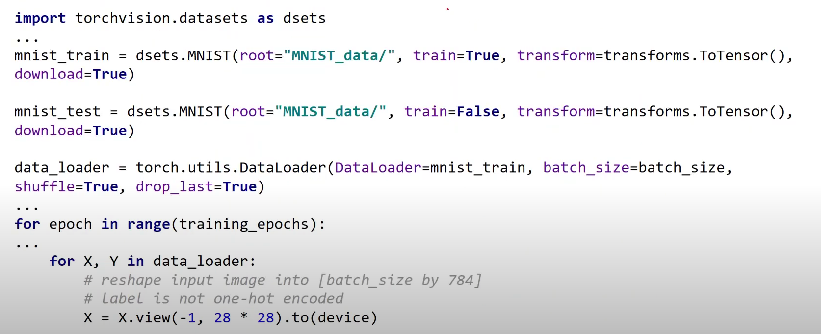

**Epoch / Batch size / Iteration**

**Epoch**
- Training Set전체가 한번 학습에 사용이되면 1 epoch이 돌았다라고 한다.

**Batch size**
- 한 epoch을 돌기위한 사이즈가 클경우 epoch을 잘라 사용하는데 이것을 몇개로 나눌것인지, 몇개의 batch를 사용할  것 인지

**Iteration**
- batch를 몇번 학습에 사용을 했는지


ex) 1000개의 Training Set이 있고, batch size가 500이다(2개의 batch). 그러면 이 2개의 batch를 이용해서 2 iteration하게 되면 1 epoch이 끝났다.

**Classifier를 학습하는 방법(Softmax)**

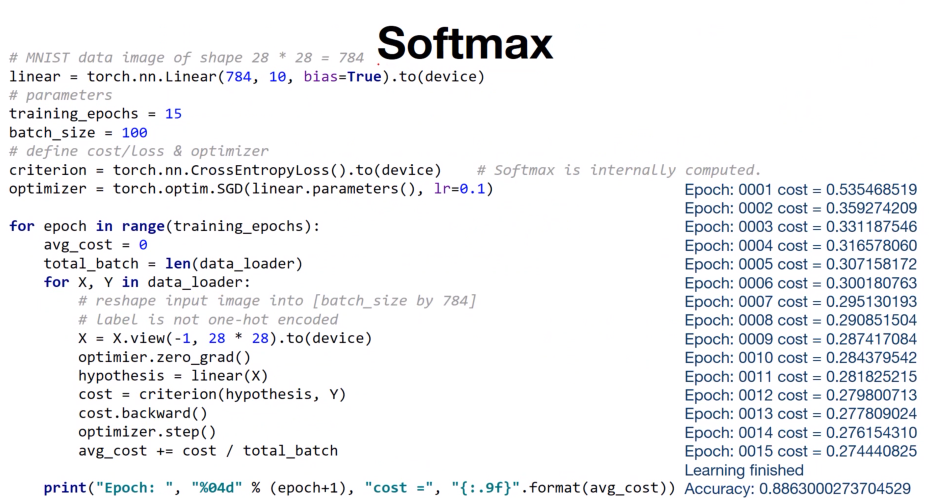

**Test**

torch.no_grad() - gradient를 계산을 안하겠다는 뜻
// Test를 할때 사용하는 습관을 기르면 실수를 줄일 수 있음
// 속도가 향상됨

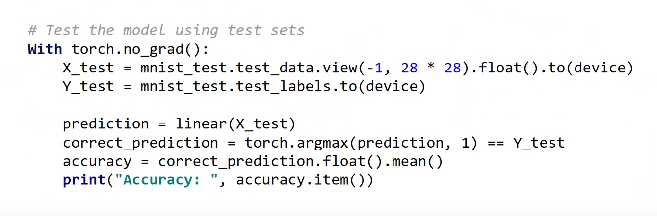

**Visualization**

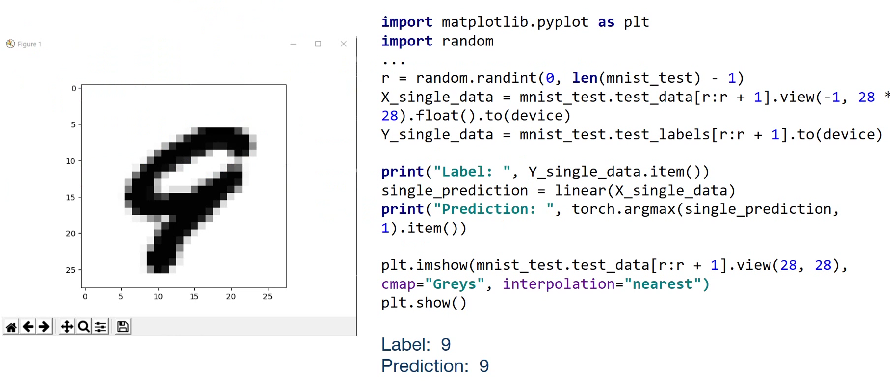